****Importing Dependencies****

In [17]:
import pandas as pd
import numpy as np

**Loading In data And printing out sample**


In [18]:
data = pd.read_csv("archive/adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Shape of data(Number of rows and columns) 400 rows and 9 columns**

In [19]:
data.shape

(400, 9)

**Fetching more details of each feature column**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**statistical summary of our data**

In [21]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Visualizing the highest ocurring "Chance of admission"**

<AxesSubplot: ylabel='Density'>

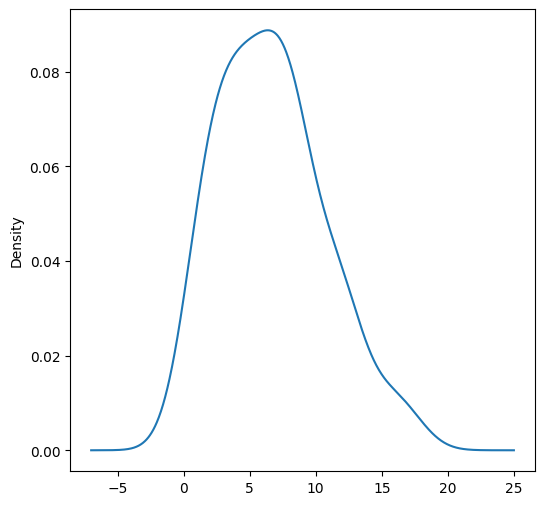

In [22]:
data['Chance of Admit '].value_counts().plot(kind='density', figsize=(6, 6))

**Visualizing Frequuency of CGPA scores**

<AxesSubplot: ylabel='Density'>

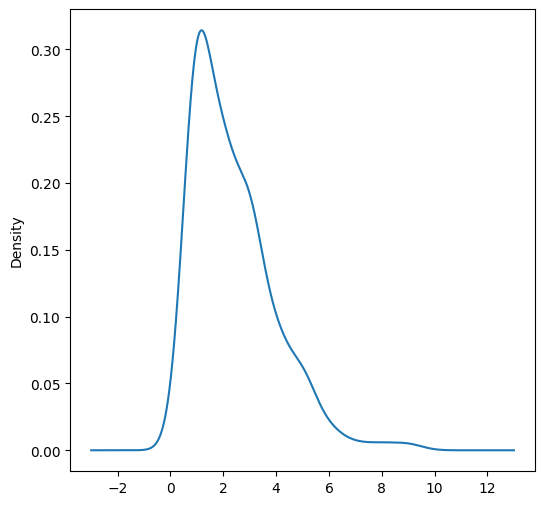

In [24]:
data['CGPA'].value_counts().plot(kind='density', figsize=(6, 6))

In [25]:
import matplotlib.pyplot as plt

**Checking the correlation between each feature/column and the target(Chance of Admit)**
Here we basically see  which columns have a strong influence in determining the chances of admission.

In [26]:
corr_ = data.corr()
corr_

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


**Plotting a Correlation matrix**

The darker the green color the more influence that column has on determining the chances of admission

([<matplotlib.axis.YTick at 0x1a539490580>,
 [Text(0, 0, 'Serial No.'),
  Text(0, 1, 'GRE Score'),
  Text(0, 2, 'TOEFL Score'),
  Text(0, 3, 'University Rating'),
  Text(0, 4, 'SOP'),
  Text(0, 5, 'LOR '),
  Text(0, 6, 'CGPA'),
  Text(0, 7, 'Research'),
  Text(0, 8, 'Chance of Admit ')])

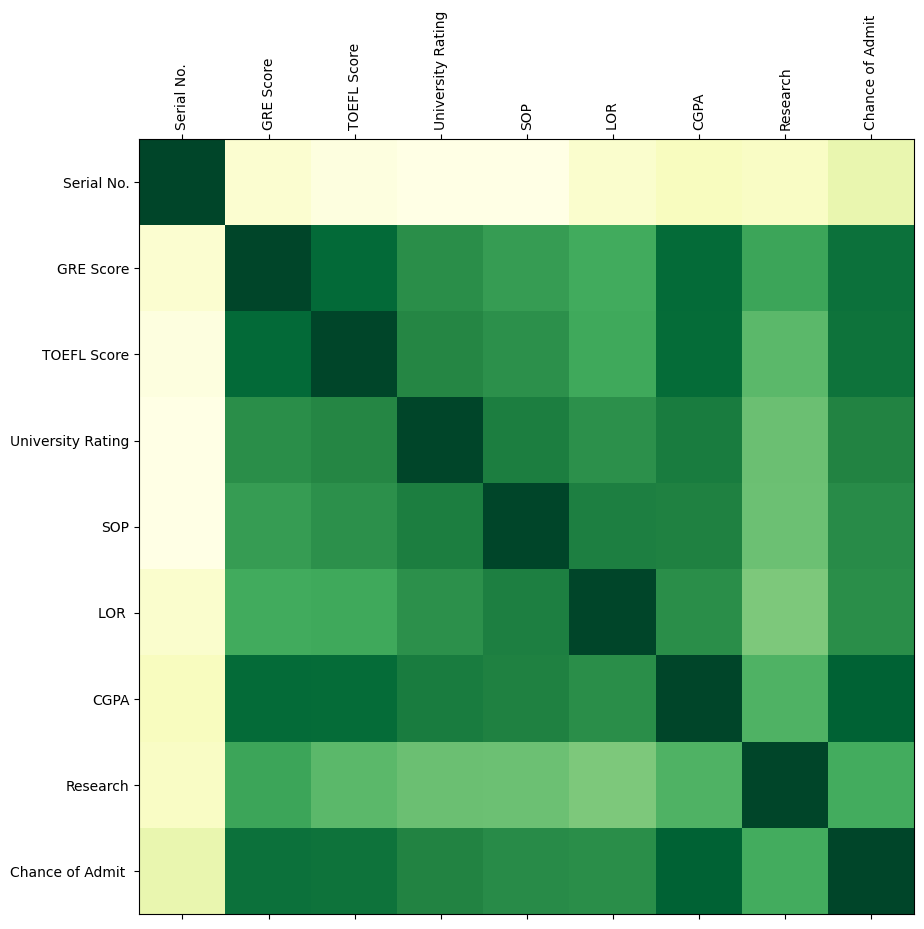

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.matshow(corr_, cmap="YlGn",fignum=fig.number)
plt.xticks(range(len(corr_.columns)), corr_.columns, rotation='vertical')
plt.yticks(range(len(corr_.columns)), corr_.columns)

**A Scatter plot to show correlation between the serial number of a student and his/her chances of getting admmitted**

Here there's theres very literally zero patterns suggesting a direct connection between a student's serial number and their chancess of getting admitted.

<AxesSubplot: xlabel='Serial No.', ylabel='Chance of Admit '>

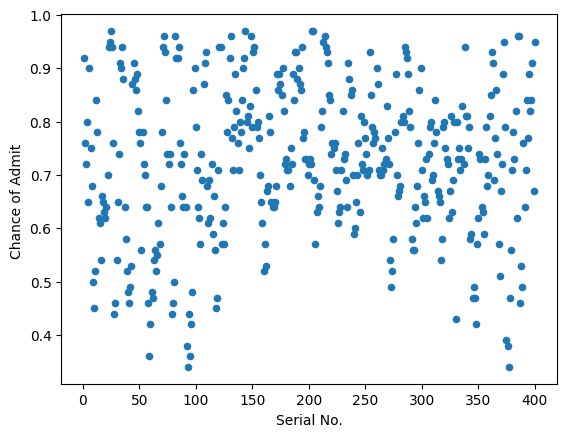

In [28]:
data.plot(kind="scatter", x='Serial No.', y='Chance of Admit ')

**A Scatter plot to show correlation between the CPGA score of a student and his/her chances of getting admmitted**

Here there's a clear pattern suggesting a direct connection between a student's CPGA score and their chancess of getting admitted, you can see here that a high CGPA score directly increases the chance of admission.

<AxesSubplot: xlabel='CGPA', ylabel='Chance of Admit '>

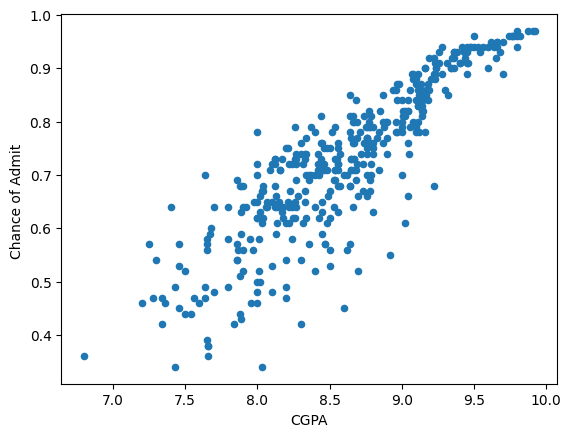

In [29]:
data.plot(kind="scatter", x='CGPA', y='Chance of Admit ')

**A Scatter plot to show correlation between the GRE score of a student and his/her chances of getting admmitted**

Here there really isn't a clear pattern suggesting a direct connection between a student's GRE score and their chancess of getting admitted, here you can see that a high GRE score doesn't necessarily increase your chancess of admission. 

<AxesSubplot: xlabel='GRE Score', ylabel='Chance of Admit '>

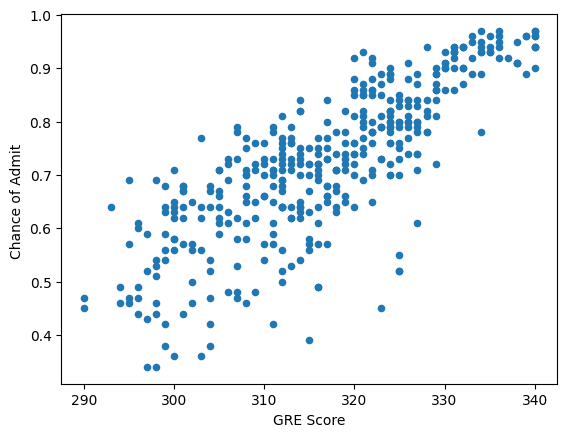

In [30]:
data.plot(kind="scatter", x='GRE Score', y='Chance of Admit ')

**Columns with less correlations are dropped from the data**

In [32]:
X = data.drop(['Serial No.', "GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "Research", 'Chance of Admit '], axis=1)
X

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
395,9.04
396,9.11
397,9.45
398,8.78


**We split data into training and test sets**

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

**Creating a Linear Regression object and training our model**

In [42]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Plotting our linear regression model graph**

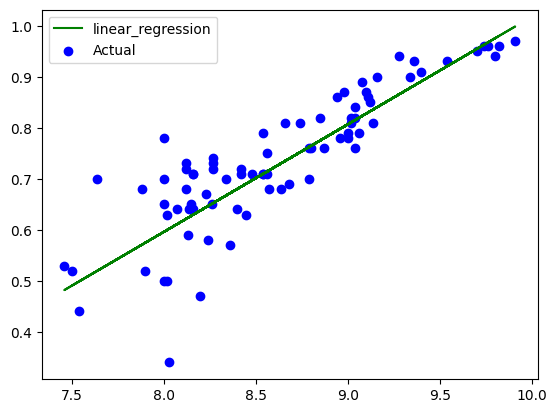

In [44]:
predict = lr.predict(x_test)

plt.plot(x_test, predict, label="linear_regression", color='g')
plt.scatter(x_test, y_test, label="Actual", color='b')
plt.legend()
plt.show()